In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class CovidRepository:

    table = "timeseries"
    db_url = "C:\\Ealvarez\\Personal\\Maestría en Analítica y Gerencia de Datos\\II Semestre\\Programacion_analitica_datos\\Talleres\\Taller 5\\covid19.db"

    def __init__(self):
        self.__connection = sqlite3.connect(self.db_url)

    def getCasosCovid(self):
        try:
            query = f"""
                        Select 
                        	t.date ,
                        	sum(t.confirmed),
                        	sum(t.deaths),
                        	sum(t.recovered)
                        from timeseries t 
                        where t.id in (
                        	select l.id 
                        	from location l 
                        	where l.iso_alpha_2  = "CO"
                        )
                        group by t.date
                        order by t.date asc;
                        """
            cursor = self.__connection.cursor()
            cursor.execute(query)
            results = cursor.fetchall()
            return results
        except Exception as e:
            print(f"Error {e}")


In [3]:
Covid_Repository = CovidRepository()

In [4]:
casos = Covid_Repository.getCasosCovid()
for i in range(len(casos)):
    print(i,"->",casos[i])

0 -> ('2020-03-05', None, None, None)
1 -> ('2020-03-06', 3, None, None)
2 -> ('2020-03-07', None, 3, None)
3 -> ('2020-03-08', None, None, None)
4 -> ('2020-03-09', 7, None, None)
5 -> ('2020-03-10', None, 4, None)
6 -> ('2020-03-11', 24, 5, None)
7 -> ('2020-03-12', 30, None, None)
8 -> ('2020-03-13', 40, None, 3)
9 -> ('2020-03-14', 98, None, 6)
10 -> ('2020-03-15', 128, 6, 5)
11 -> ('2020-03-16', 152, 6, None)
12 -> ('2020-03-17', 238, None, 5)
13 -> ('2020-03-18', 215, None, None)
14 -> ('2020-03-19', 343, None, 7)
15 -> ('2020-03-20', 443, None, 12)
16 -> ('2020-03-21', 577, None, 22)
17 -> ('2020-03-22', 584, 12, 30)
18 -> ('2020-03-23', 848, 9, 55)
19 -> ('2020-03-24', 1062, 11, 79)
20 -> ('2020-03-25', 1295, 24, 80)
21 -> ('2020-03-26', 973, 21, 140)
22 -> ('2020-03-27', 1075, 25, 160)
23 -> ('2020-03-28', 1518, 41, 301)
24 -> ('2020-03-29', 1803, 38, 348)
25 -> ('2020-03-30', 2049, 60, 440)
26 -> ('2020-03-31', 2435, 73, 499)
27 -> ('2020-04-01', 2833, 70, 579)
28 -> ('2020-0

In [5]:
x = range(0,len(casos))
print(x)

range(0, 691)


In [20]:
y = []
for i in x:
    y.append(0 if casos[i][1] is None else casos [i][1])

y1 = []
for i in x:
    y1.append(0 if casos[i][2] is None else casos [i][2])

y2 = []
for i in x:
    y2.append(0 if casos[i][3] is None else casos [i][3])

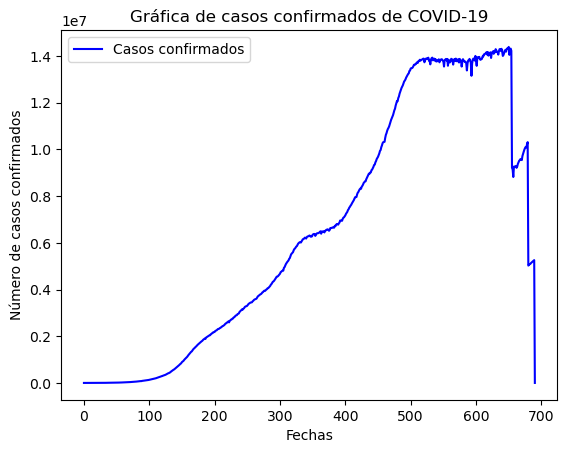

In [31]:
#Gráfica Casos Confirmados

plt.plot(x,y,label="Casos confirmados", color="b")
plt.legend(loc="upper left")

plt.title("Gráfica de casos confirmados de COVID-19")
plt.xlabel("Fechas")
plt.ylabel("Número de casos confirmados")

plt.show()

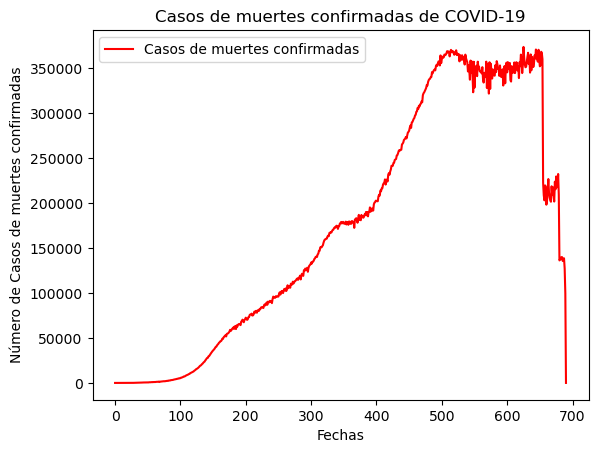

In [32]:
#Gráfica Casos de Muertes Confirmadas

plt.plot(x,y1,label="Casos de muertes confirmadas", color="r")
plt.legend(loc="upper left")

plt.title("Casos de muertes confirmadas de COVID-19")
plt.xlabel("Fechas")
plt.ylabel("Número de Casos de muertes confirmadas")

plt.show()

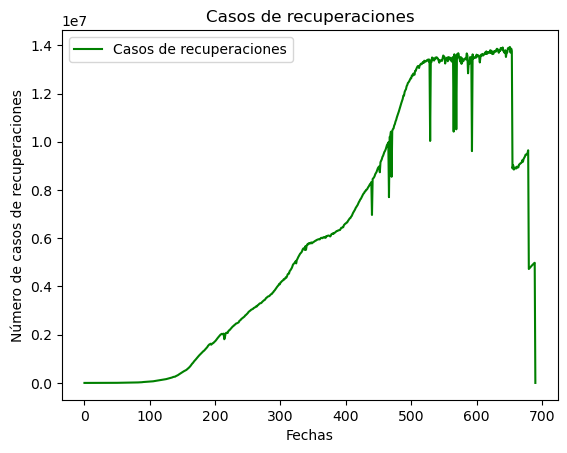

In [33]:
#Gráfica Casos de Recuperaciones

plt.plot(x,y2,label="Casos de recuperaciones", color="g")
plt.legend(loc="upper left")

plt.title("Casos de recuperaciones")
plt.xlabel("Fechas")
plt.ylabel("Número de casos de recuperaciones")

plt.show()

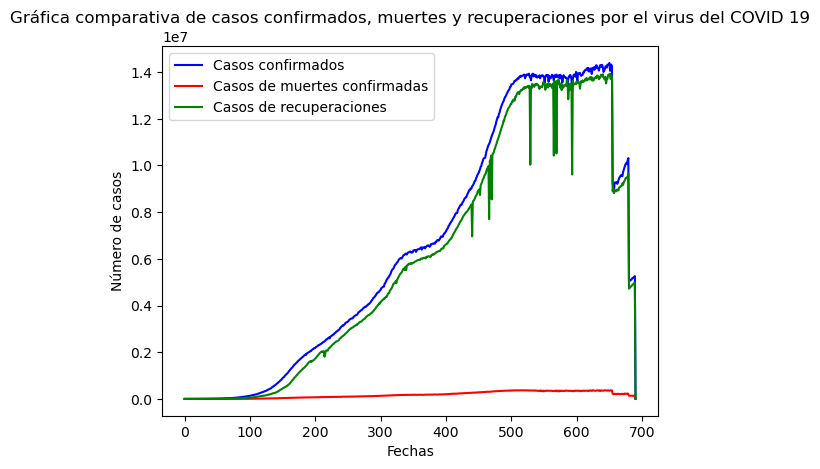

In [35]:
#Gráfica comparativa de casos confirmados, muertes y recuperaciones por el virus del COVID 19

plt.plot(x,y,label="Casos confirmados", color="b")
plt.plot(x,y1,label="Casos de muertes confirmadas", color="r")
plt.plot(x,y2,label="Casos de recuperaciones", color="g")
plt.legend(loc="upper left")

plt.title("Gráfica comparativa de casos confirmados, muertes y recuperaciones por el virus del COVID 19")
plt.xlabel("Fechas")
plt.ylabel("Número de casos")

plt.show()